# A comprehensive but gentle introduction to neural networks

As time progresses we find more and more advanced AI models being pushed out at a much faster rate. In the age of DCGAN's, LLM's as advanced as GPT-4, and even quantum machine learning making leaps like quantum GAN's, it is easy to be hit with a very steep learning curve when it comes to actually understanding the models itself and the advanced mathematics of it all. This series aims to start from the very beginning starting with feed forward networks from scratch and ending with advanced models like deep convolutional generative adversarial networks without using frameworks like Keras or Tensorflow.


To start we have the feed forward network, consisting of practically only the basics; weights, neurons, bias, activation functions, loss functions, optimizer functions, and backpropagation. Before jumping into the grand scheme of the network itself we will break down the network into its individual components to establish a concrete understanding of how machines can actually learn.

A small disclaimer before moving forward, this notebook and future notebooks styled like this are meant to give an introduction into the topics that will be utilized in proceeding notebooks that focus on the construction, tuning, training, and evaluation of each network specified. Some sections are a little more vague than most due to the degree of importance for moving forward with the series. For anyone interested in learning more in depth about each individual component of a neural network there is a video and article section below with a lot of helpful resources that helped me create this notebook.

### Neurons
At the absolute base of the neural network you have the neuron itself modeled and named after human neurons. For this network the neurons consist of weights, bias, an activation function, and output. Your typical feed forward network will have an input layer consisting of a 1D vector making up your entire dataset, a hidden layer where the learning and more complex operations occur, and the final output layer that dictates what decision should be made. Neurons will consist of connections from each neuron on the previous layer, an activation function, bias, and weight factor. With that in mind the proceeding sections will cover each component of the neuron in depth.

![](https://learnopencv.com/wp-content/uploads/2017/10/neuron-diagram.jpg)

### Activation Functions and Bias
Activation functions are the basis for how networks react to data being passed. These functions add non-linearity to the model by passing outputs from neurons into a mathematical function, transforming the input, and passing the output forward in the case of a feed forward neural network. non-linearity is especially important in abstractions such as non-linear decision boundaries. For example take the handwritten digit 12, the network has to abstract the digit into corresponding pixel pattern chunks, the digits more than often not even and do not have a linear boundary. With activation functions networks can pick up on these non-linear patterns by running inputs through non-linear activation functions. Mathematically neurons operate by summations, taking the outputs of the previous neuron layer, multiplying associated weight values, and summing the resulting values. The equation would typically look like the following$$\sum_{i=0}^{OutputLength} (O_1*W_1+O_2*W_2 ... O_N*W_N)+Bias$$ The resulting summation value notated as X will then be passed to an activation function, in this example we will go with the hyperbolic tangent line or tanh $$f(x)=\frac{e^x-e^{-x}}{e^x+e^{-x}}$$

The bias variable is its own unique additive to a neural network, it dictates how high a value needs to be in order for a neuron to fire or have any sort of meaningful impact on the network. In most visualizations of neural networks there will be a shade variation of a color chosen for each layer, for example the visual below chose red for the hidden layer but different shades of red correspond with differing levels of neuron values. Bright red means the neuron's bias factor was met or exceeded and the neuron fired, lighter shades of red mean the neuron's output value was lower than the bias value thus having no real effect on the network's decision.

![](https://miro.medium.com/v2/1*dmoRN3Wh7xyDQ1bDQcnToA.gif)

### Weights and Weight Initialization
Weights of a neuron can be best summarized as connection strength factors. These weights are usually pre initialized for the first training loop between neurons, as the network iteratively learns through training sessions these values are updated, the algorithms used to determine the strength of neuron connections are called optimization functions and it is how neural networks learn. While by default weights are randomly generated there are a few techniques that are used to help the network further along with the learning process by pre-initializing weights. Based on what kind of activation function you have you will end up with a different initialization process, for example your network is using the rectified linear unit activation function or ReLU you will most likely be using the He initialization technique vs a network with a hyperbolic tangent activation function using the Xavier technique. These methods help mitigate certain issues such as symmetry and overfitting, symmetry causes the network to not abstract certain aspects of the data and overfitting causes the network to simply just learn the dataset rather than the abstracted components of a dataset. 

### Loss Functions and Optimization

Loss functions are a crucial metric used in gradient calculations and the model's overall learning by adjusting weights based on the loss functions output. Loss functions follow the formula of taking computed predictions layer by layer then comparing it to the actual values expected or the labels, quantifying the error between the two variables. In order for the network to actually learn and use this metric, a process called back propagation occurs where the chain rule of calculus is applied iteratively backwards through the network starting at the output layer and ending at the input layer. Each layer in the network will have its own gradient and the chain rule will be applied to each individual neuron's output for each layer. This is how the process would look mathematically with respect to weights: $$\frac{∂L}{∂w}=\frac{∂L}{∂a}X\frac{∂a}{∂z}X\frac{∂z}{∂w}$$ And with respect to the bias: $$\frac{∂L}{∂b}=\frac{∂L}{∂a}X\frac{∂a}{∂z}X\frac{∂z}{∂b}$$Where L is a given loss function, w is an associated weight with a neuron's input, b is an associated bias, z is the weighted sum of inputs and bias represented as $z=wx+b$, and a is the output of a neuron after an activation function is applied. This generates out loss gradient and when mapped will look something like this:

![](https://miro.medium.com/v2/resize:fit:1280/1*axX6tH9jqJEFikJ6ThCeeg.gif)


The gradient calculated will point in the direction of steepest descent based on loss function calculations. From here we update specified parameters with the equation $$θ_{t+1}=θ_t-α∇L(θ_t)$$ Where $θ$ is the parameter being updated such as the bias or weights based on the respective generated gradients. With these functions the AI can actually learn and move forward with abstraction on more randomized sets of data.

### Learning Rates
As mentioned in the previous section the learning rate factor influences the parameter updating process, this itself is a hyperparameter that can be tuned and is mathematically denoted by $α$. The learning rate dictates the size of the steps taken in the direction of the gradient's local minima in order to update weights. Since the learning rate is a hyperparameter there is no one-size fits all value especially since the path towards local minima in a gradient can have varying lengths even within the same gradient. What can be done however is moving through training iterations, adjusting the weight accordingly, and analyzing the gradient itself

### Regularization
While we can tune the hyperparameters of a model to achieve accurate abstraction of input data, there is another measure we can use to prevent overfitting and improve the overall generalization performance of a model. Regularization introduces a sort of penalty system to the network, an example of this would be L2 regularization or Ridge regression, this scheme adds an extra variable to the previously mentioned loss functions. For L2 regularization this variable is proportional to the square of the magnitude of the weights therefore penalizing large weight values and keeping abstraction within a certain boundary. Given an example loss function of MSE or mean squared error, without L2 the function would look like the following: $$\frac{1}{n} \sum_{i=1}^n(y_i-y2_i)^2$$ Where $y$ is the target value, $y2$ is the predicted value, and $n$ is the number of samples.When we introduce L2 the function will now look like: $$λ\sum_{i=1}^n{w^2_i}$$ In this instance the $λ$ variable is the regularization factor hyperparameter controlling the strength of the regularization, $n$ is the number of features, and $w_i$ is the associated weight. 

L1 and L2 regularization penalty boundaries:
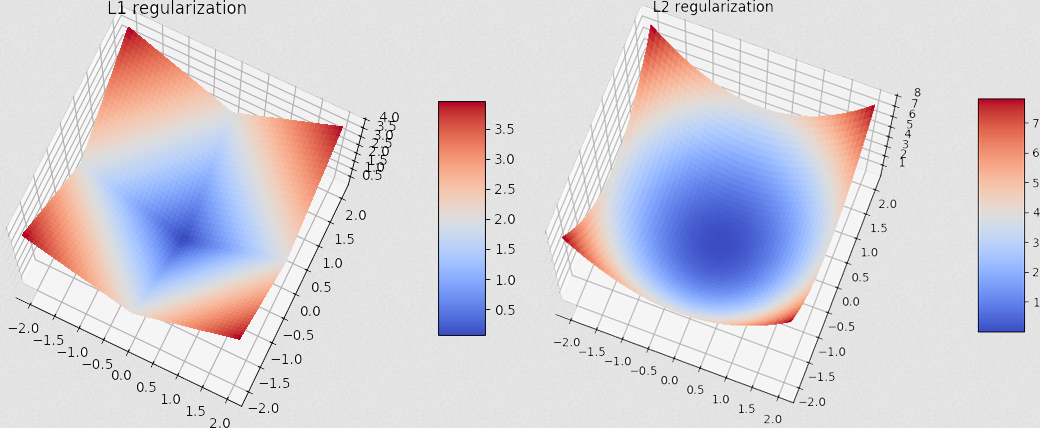

### Stability
Stability functions do not have any impact on the performance of the neural network but they are a good tool for measuring the sensitivity of a model's predictions when changes to the input are made. In other words these formulas can measure the performance of a neural network when its input database is changed and can be extremely useful for verification of dataset quality and verification of the neural networks structure, hyperparameter tuning, and chosen function reliability. 

### model Evaluation Metrics
This subject encompasses a wide variety of metrics that can be used to evaluate a models accuracy, performance, and effectiveness in predictions up against abnormal datasets. Some common metrics include the F1 score, the gain and lift charts, and the Kolomogorov Smirnov charts. F1 and Kolomogorov Smirnov is mostly used in classification problems Gain/Lift is more used in probability based networks such as feed forwards, object detection use cases, and implementations that require abstraction of datasets. 

![](https://miro.medium.com/v2/resize:fit:1358/0*qMNUgEYSNWR2uhm3)

### epochs and Batch Size
These two hyperparameters are another crucial element used in dictating how much input data is processed at a time and how many times the dataset is iterated over respectively. Looping back to gradient descent, the batch size will control the number of training samples used while the epoch size will control the number of complete forward passes through the entire dataset before the targeted parameters are updated through gradient descent. 

### The Data
This is one of the most crucial parts of ensuring a neural network of any kind will succeed in doing what it was built to do, the way your data is formatted, obtained, transformed, and presented to the network will be the ultimate factor in determining the efficiency of a model. There is a balance that needs to be struck between too large of a dataset and too small of a dataset. While a large dataset is not necessarily a problem it can greatly reduce the practicality of training the network especially when it comes to dealing with smaller computational resources, smaller production times, or smaller deployment environments. A smaller dataset on the other hand will solve all these problems but will not be able to pick up on variation you may want the network to recognize when introducing a testing dataset and future datasets thrown at the model.

### Hyperparameter Tuning
Hyperparameters make up tunable variables that can have a variety of impact on a neural network. The exact hyperparameters that exist on a network will wildly vary from the data structure to the network structure. Your typical hyperparameters will consist of batch size, epochs, neuron count in each layer, the number of layers, network architecture layers, the type of activation functions, loss functions, optimizer functions, and weight initialization schemes.

![](https://miro.medium.com/v2/resize:fit:1400/1*_9coeJ4OSPqAjiKLcQqiew.png)

### Moving Forward

Without making this a 60 minute read I will be fragmenting notebooks into the depths, mathematics, ideas, applications, and theories behind the networks themselves such as this notebook and the actual scratch code. The next notebook being released will contain all the code encompassing the topics covered here and will further dive into the exact functionality of each concept including a variety of code examples and sub-examples branching off of the primary code foundation that will be used further throughout this series.

### Recomended Watches/Reads and Sources
https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi

https://www.analyticsvidhya.com/blog/2022/03/basic-introduction-to-feed-forward-network-in-deep-learning/

https://developers.google.com/machine-learning/crash-course

https://deepai.org/definitions

https://www.analyticsvidhya.com/blog/2019/08/11-important-model-evaluation-error-metrics/

http://www.offconvex.org/2016/03/14/stability/